In [1]:
import numpy as np
import math
import scipy.optimize as opt
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from sympy import diff, symbols, cos, sin

from scipy.optimize import fsolve
import matplotlib.tri as mtri

[-4.75820003e-08 -4.75820003e-08]


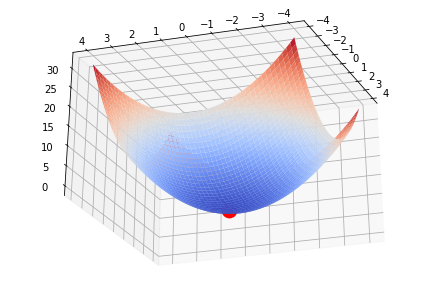

In [2]:
f = lambda x: (x[0])**2 + (x[1])**2
        
fig = plt.figure()
axes = Axes3D(fig)

xgrid =np.linspace(-4, 4, 100)
ygrid =np.linspace(-4, 4, 100)

x, y = np.meshgrid(xgrid, ygrid)
z = f([x, y])


axes.plot_surface(x, y, z, cmap='coolwarm', linewidth=2)
min = opt.minimize(f, [2, 2])
print(min.x)
axes.scatter3D(min.x[0], min.x[1], f([min.x[0], min.x[1]]), s = 250, zorder = 100, color = 'red', linewidth=0, antialiased=False)
axes.view_init(-30, 200)
plt.show()

In [3]:
x1, y1 = symbols('x1 y1')
f = x1**2 + y1**2
print(diff(f ,x1))
print(diff(f,y1))

2*x1
2*y1


[ 0.99999984 -0.99999992] 2.600242493973575e-13


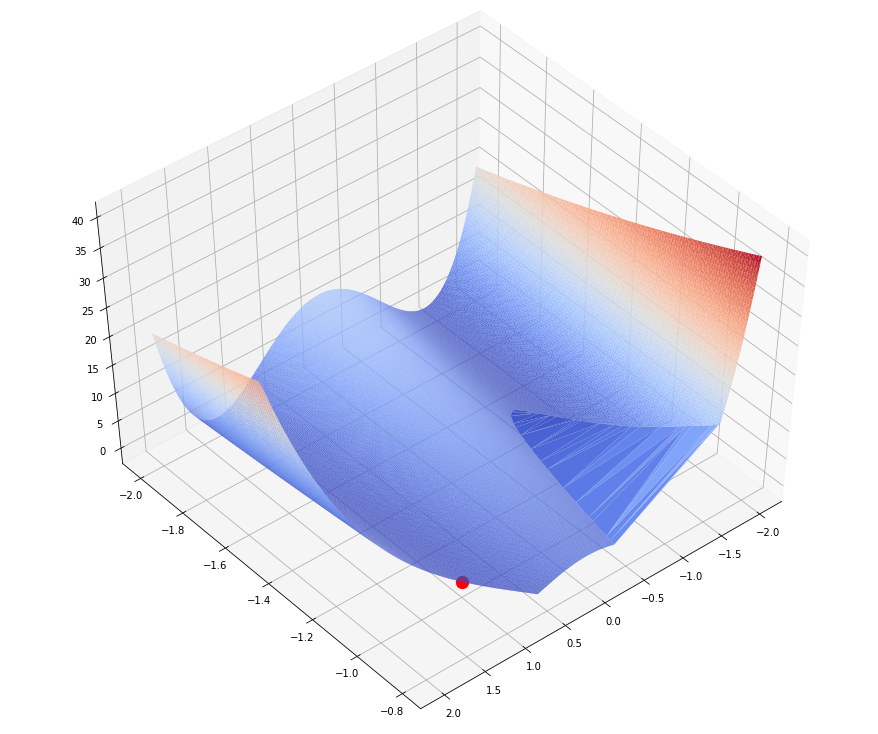

5.551115123125783e-17
-36.999993312386366
-0.19999992223704788
lamda1 = 8.087344976683656e-06
lamda1 = 1.399732990847724e-06


In [19]:
f = lambda x:  3*(x[1] + x[0]**2)**2 + (x[0]**2 - 1)**2
g1 = lambda x:  (x[1] + 0.5*x[0] + 0.5)
g2 = lambda x:  -10*(x[0] + 1)**2 - (x[1] - 2)**2 + 12
g3 = lambda x:  x[1] + 0.8
fig = plt.figure(figsize=(12, 10))
axes = Axes3D(fig)

x =np.linspace(-2, 2, 400)
y =np.linspace(-2, 2, 400)
ftri, xtri , ytri = [], [], []
for i in range(0, x.shape[0]):
    for j in range (0, y.shape[0]):
        if (0 > g1([x[i], y[j]])) and (0 > g2([x[i], y[j]])) and (0 > g3([x[i], y[j]])):
            #axes.scatter(x[i], y[j], f([x[i], y[j]]), s=50, color='red', zorder=50)
            xtri.append(x[i])
            ytri.append(y[j])
            ftri.append(f([x[i], y[j]]))
            
triang = mtri.Triangulation(xtri, ytri)
axes.plot_trisurf(triang, ftri, cmap='coolwarm')
            
xgrid =np.linspace(-1, 1, 100)
ygrid =np.linspace(-2, 1, 100)

x, y = np.meshgrid(xgrid, ygrid)
z = f([x, y])
z1 = g1([x, y])
z2 = g2([x, y])
z3 = g3([x, y])

#axes.plot_surface(x, y, z, cmap='coolwarm', linewidth=1, zorder=1)
#axes.plot_wireframe(x, y, z1, rstride=5, cstride=5, zorder=2)
#axes.plot_wireframe(x, y, z2, rstride=5, cstride=5, zorder=3)
#axes.plot_wireframe(x, y, z3, rstride=5, cstride=5, zorder=4)

axes.view_init(50,50)

cons = ({'type': 'ineq', 'fun': lambda x:   -(x[1] + 0.5*x[0] + 0.5)},
        {'type': 'ineq', 'fun': lambda x:  -(-10*(x[0] + 1)**2 - (x[1] - 2)**2 + 12)},
        {'type': 'ineq', 'fun': lambda x:  -(x[1] + 0.8)})
res = opt.minimize(f, (-1, 1), constraints=cons, 
                   options={'maxiter': 1000, 'ftol': 1e-08})
print(res.x, f([res.x[0], res.x[1]]))
axes.scatter(res.x[0], res.x[1], f([res.x[0], res.x[1]]), s = 150, color = 'red', zorder=100, norm = 0.5)
plt.show()

print(g1(res.x))
print(g2(res.x))
print(g3(res.x))


print("lamda1 =", -2*(12 * (res.x[0]**2 + res.x[1]) + 4* (res.x[0]**2 - 1))*res.x[0])
print("lamda1 =", -6*(res.x[1] + res.x[0]**2))
#print("1 уравнение градиента", 12*(res.x[1] + res.x[0]**2)*res.x[0] + 4*res.x[0]*(res.x[0]**2 - 1))

